In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
df.shape

(2126, 14)

In [5]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()

Dataset contains 2126 rows and 14 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [6]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values:\n", missing_percent)

threshold = 50
columns_to_drop = missing_percent[missing_percent > threshold].index
df = df.drop(columns=columns_to_drop)

df_imputed = df.fillna(df.mean())

Percentage of missing values:
 LB          0.987770
AC          0.940734
FM          0.000000
UC          0.000000
DL          0.000000
DS          0.987770
DP          0.987770
ASTV        0.000000
MSTV        0.000000
ALTV        0.000000
MLTV        0.987770
Width       0.987770
Tendency    0.987770
NSP         0.987770
dtype: float64


In [9]:
df = df.fillna(df.mean())

In [10]:
for col in df.columns:
  if df[col].dtype == 'object':
    try:
      df[col] = pd.to_numeric(df[col])
      print(f"Converted {col} to numeric.")
    except ValueError:
      print(f"Column {col} cannot be converted to numeric.")

In [11]:
def detect_outliers_iqr(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


  numerical_cols = df.select_dtypes(includes=[np.number].columns.tolist())
  for col in numerical_cols:
    outliers = detect_outliers_iqr(df,  col)
    print(f"{col} has {outliers.shape[0]} ouliers.")


    df_no_outliers = df.copy()
    for col in numerical_cols:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

      print(f"after removing outliers, dataset has {df_no_outliers.shape[0]} rows.")



In [12]:

stats_summary = df.describe().T  # Transpose for better readability
stats_summary['median'] = df.median()
stats_summary['IQR'] = stats_summary['75%'] - stats_summary['25%']
print(stats_summary[['mean', 'median', 'std', 'IQR']])


                mean      median        std        IQR
LB        133.343598  133.000000  11.214328  14.000000
AC          0.003219    0.001668   0.004370   0.005606
FM          0.009894    0.000000   0.067540   0.002567
UC          0.004391    0.004484   0.003340   0.004685
DL          0.001895    0.000000   0.003343   0.003289
DS          0.000003    0.000000   0.000141   0.000000
DP          0.000175    0.000000   0.000836   0.000000
ASTV       46.995984   49.000000  18.813973  29.000000
MSTV        1.364378    1.200000   1.173632   1.000000
ALTV       10.285964    0.000000  21.205041  11.000000
MLTV        8.284887    7.500000   7.734356   6.200000
Width      70.429260   68.000000  42.719161  63.000000
Tendency    0.316371    0.000000   0.642424   1.000000
NSP         1.304507    1.000000   0.641426   0.000000


In [13]:
high_std = stats_summary[stats_summary['std'] > stats_summary['std'].quantile(0.75)]
print("variable with high standard Deviation:\n",high_std)


stats_summary['mean_median_diff'] = abs(stats_summary['mean'] - stats_summary['median'])
significant_diff = stats_summary[stats_summary['mean_median_diff'] > stats_summary['mean_median_diff'].quantile(0.75)]
print("variable with significant difference between mean and median:\n",significant_diff)

variable with high standard Deviation:
         count        mean        std         min    25%    50%    75%    max  \
LB     2126.0  133.343598  11.214328   51.842487  126.0  133.0  140.0  214.0   
ASTV   2126.0   46.995984  18.813973  -63.000000   32.0   49.0   61.0  162.0   
ALTV   2126.0   10.285964  21.205041  -91.000000    0.0    0.0   11.0  182.0   
Width  2126.0   70.429260  42.719161 -174.000000   37.0   68.0  100.0  357.0   

       median   IQR  
LB      133.0  14.0  
ASTV     49.0  29.0  
ALTV      0.0  11.0  
Width    68.0  63.0  
variable with significant difference between mean and median:
         count       mean        std    min   25%   50%    75%    max  median  \
ASTV   2126.0  46.995984  18.813973  -63.0  32.0  49.0   61.0  162.0    49.0   
ALTV   2126.0  10.285964  21.205041  -91.0   0.0   0.0   11.0  182.0     0.0   
MLTV   2126.0   8.284887   7.734356  -50.7   4.6   7.5   10.8  101.4     7.5   
Width  2126.0  70.429260  42.719161 -174.0  37.0  68.0  100.0  357

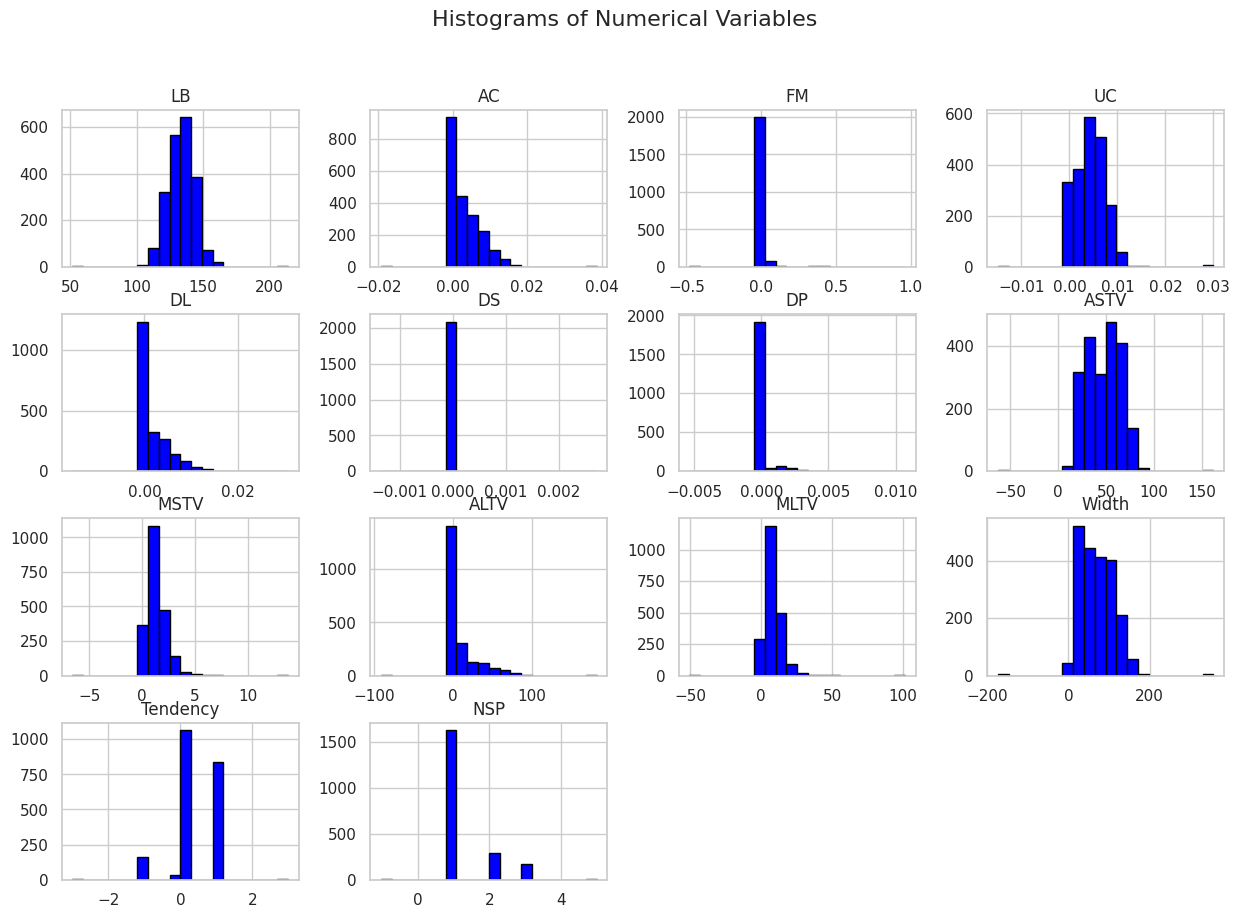

In [8]:
sns.set(style = "whitegrid")
df.hist(figsize = (15,10), bins = 20, color = "blue", edgecolor = "black")
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

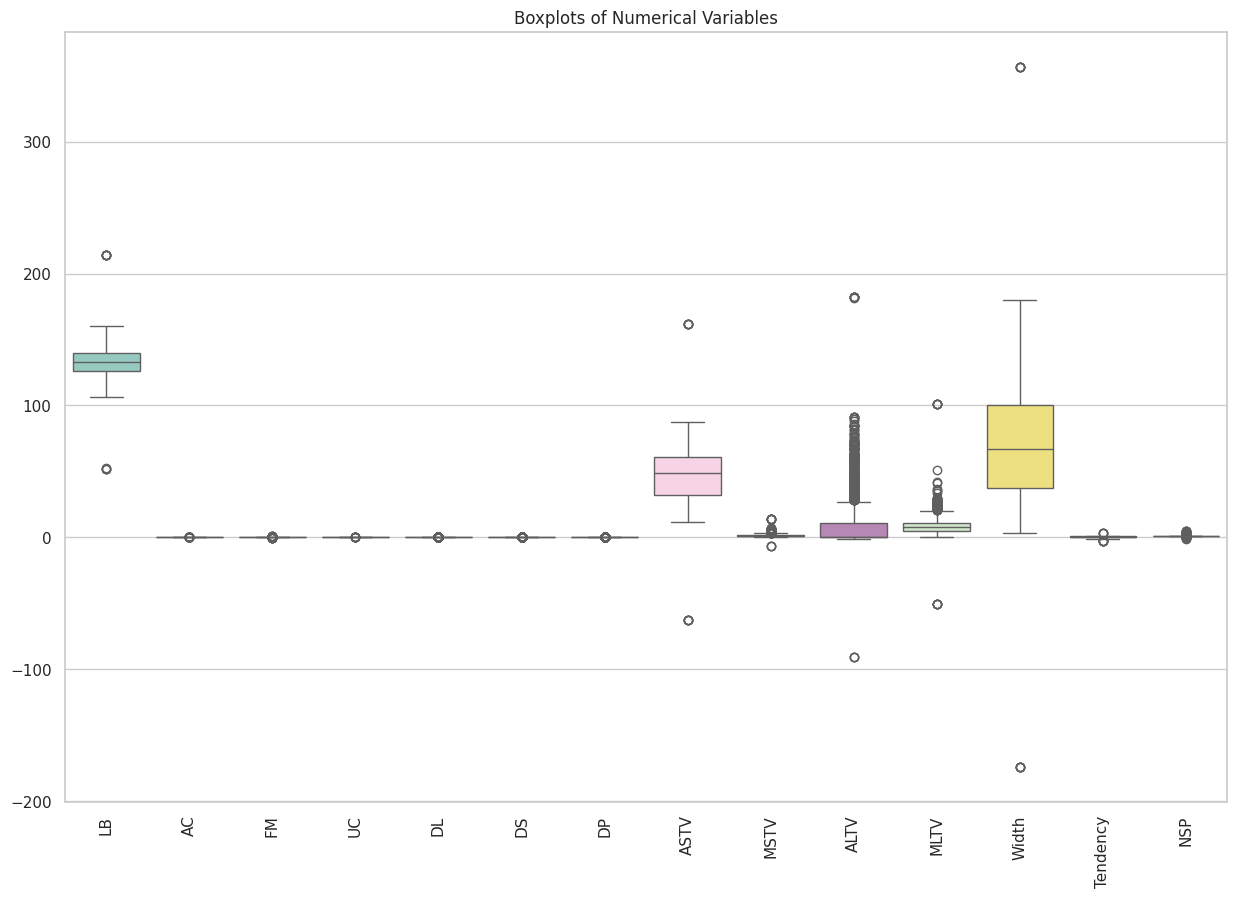

In [10]:

plt.figure(figsize = (15,10))
sns.boxplot(data = df, palette = "Set3")
plt.title("Boxplots of Numerical Variables")
plt.xticks(rotation = 90)
plt.show()

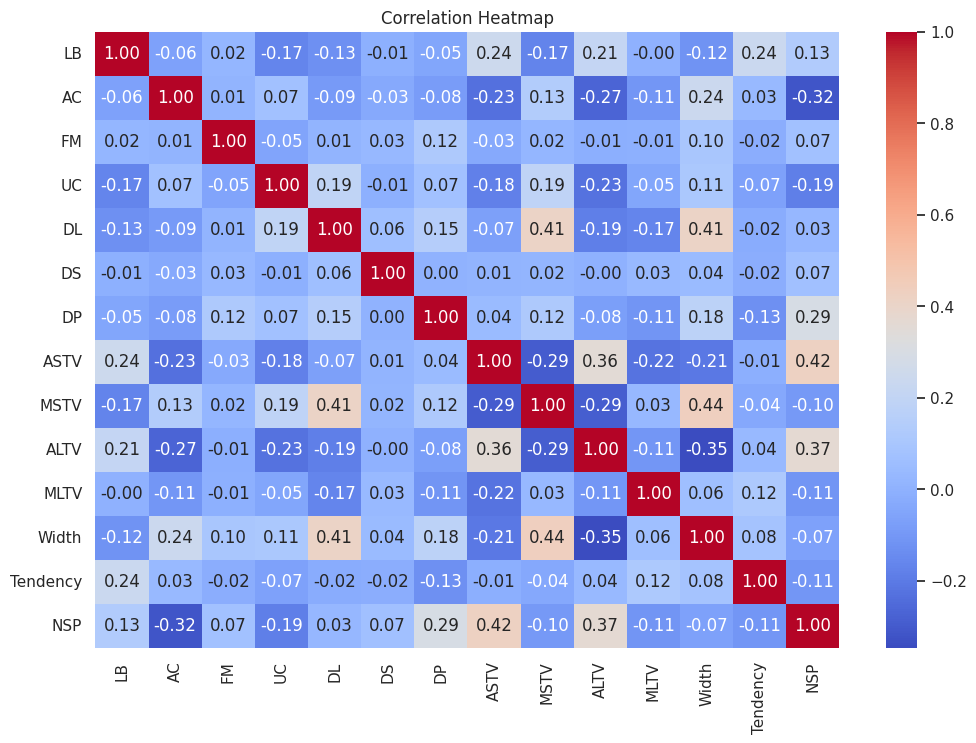

In [11]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


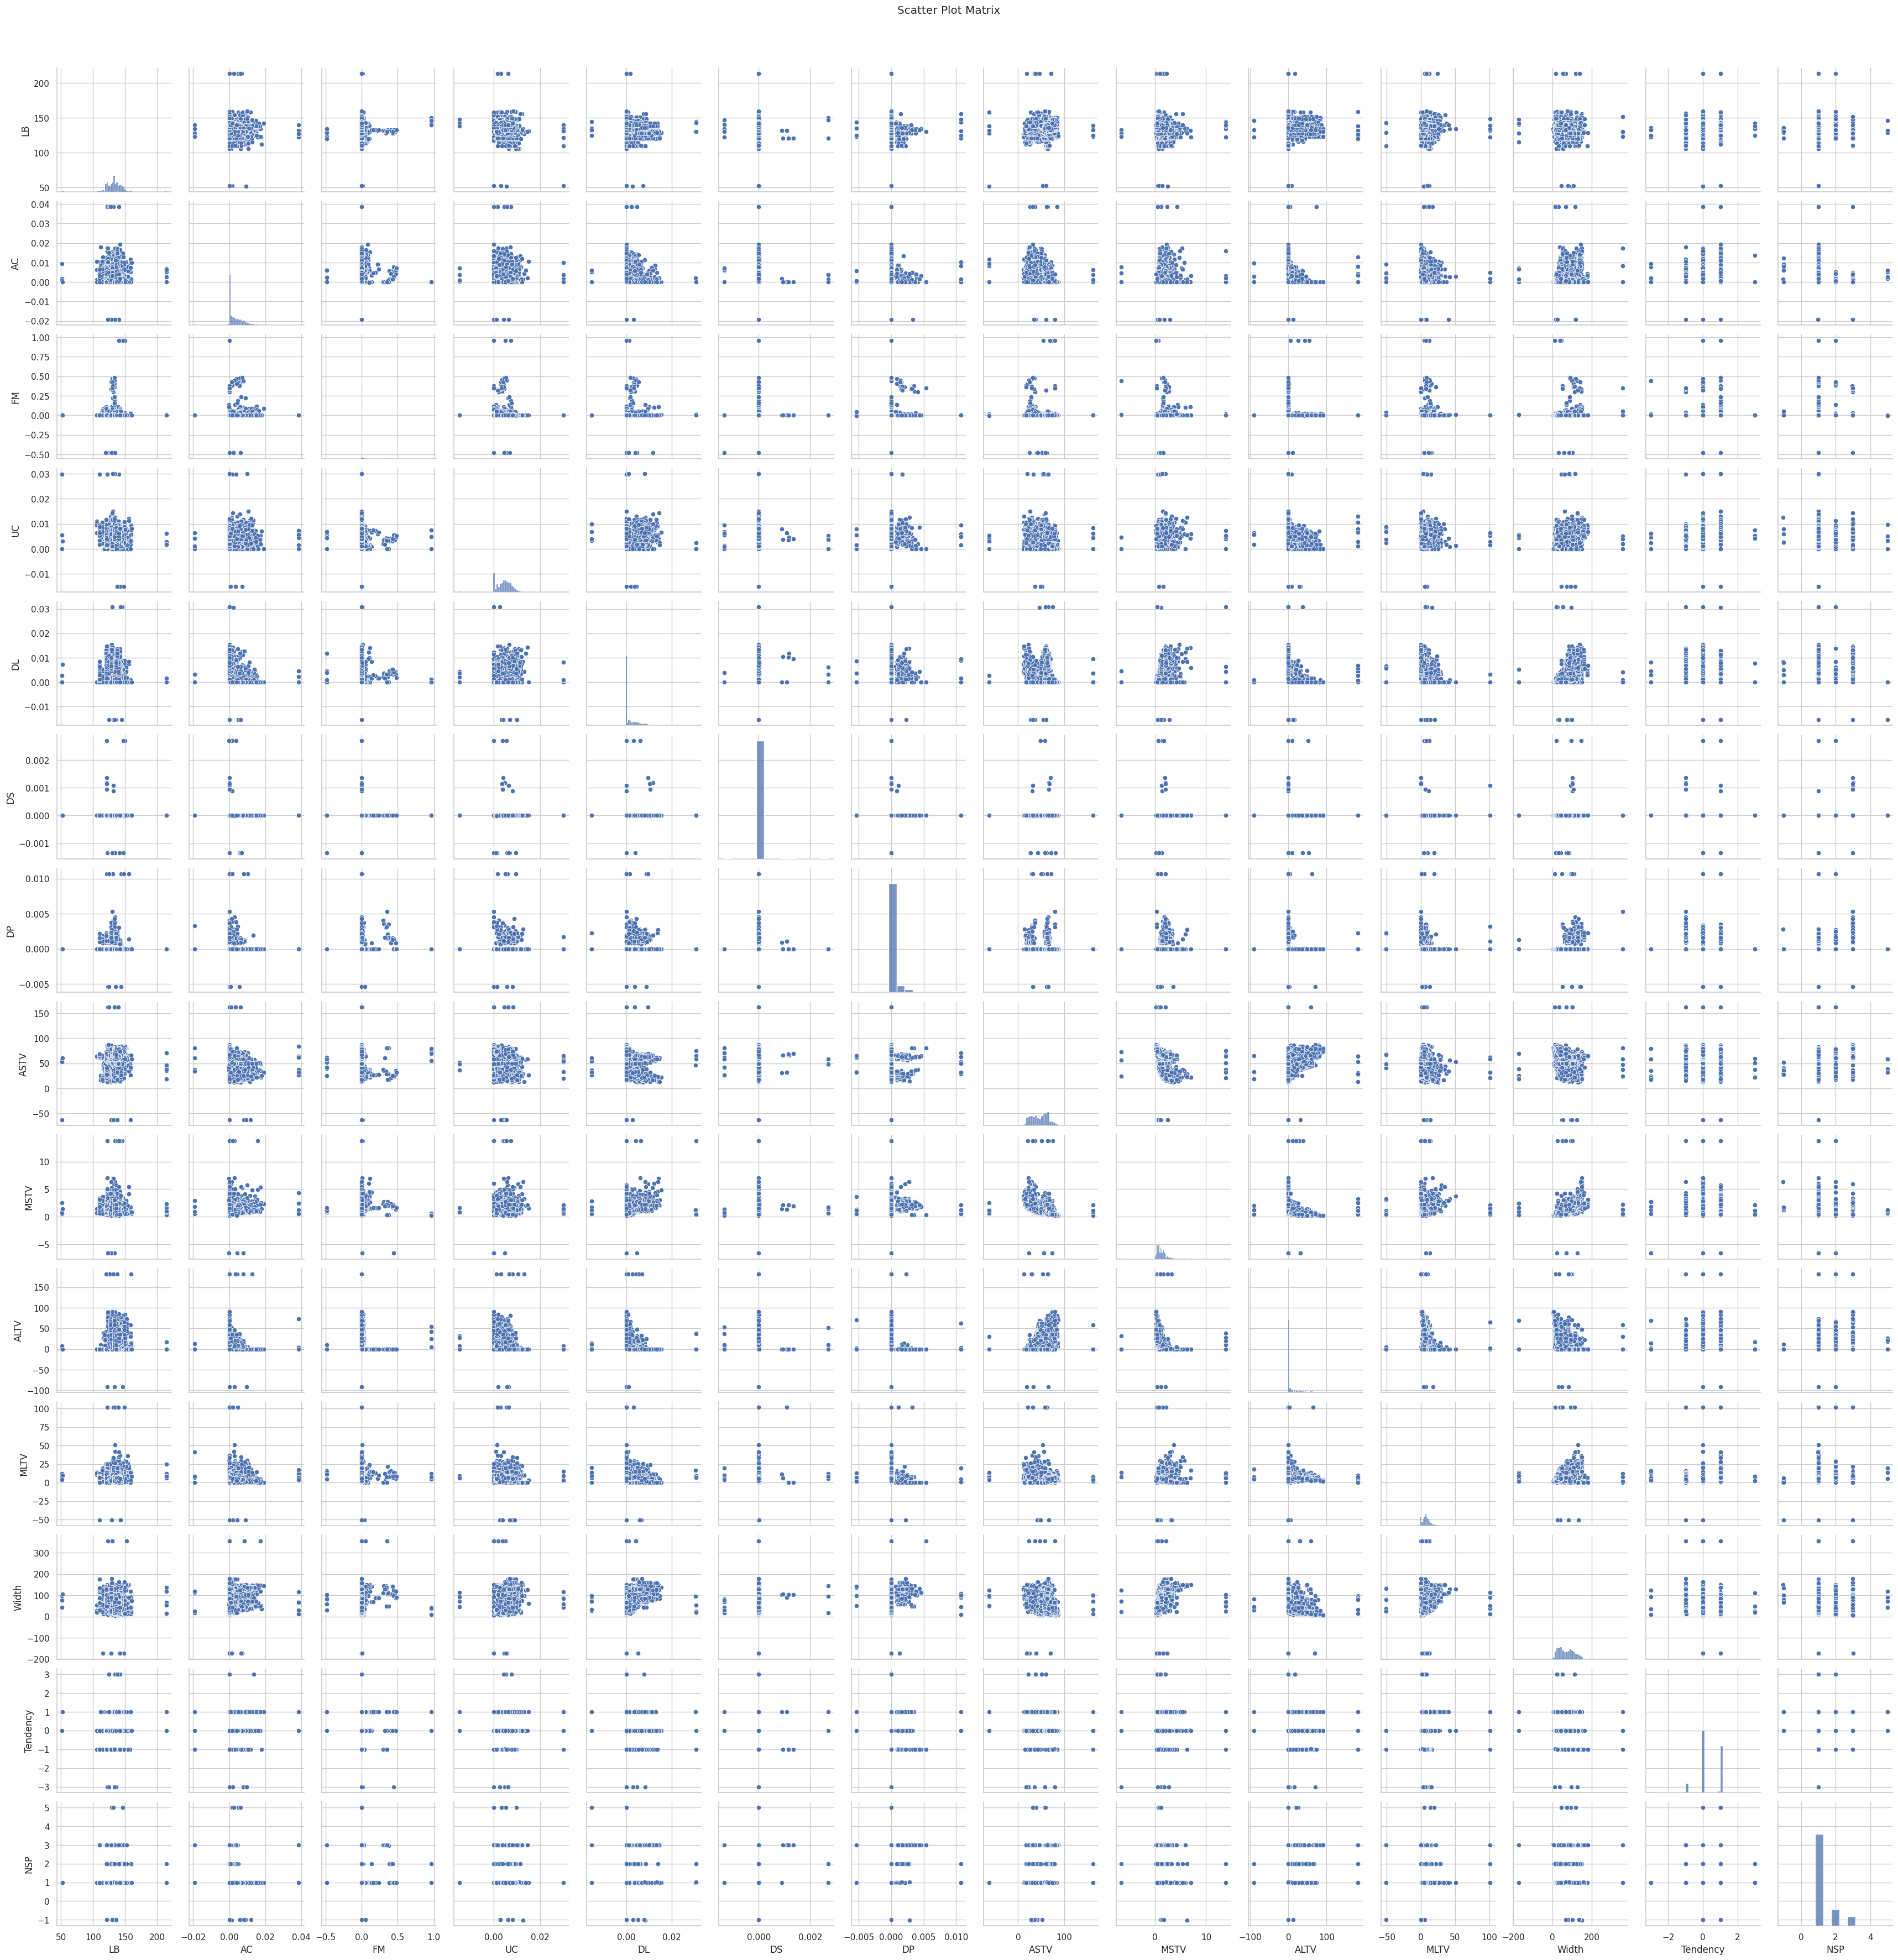

In [12]:
sns.pairplot(df)
plt.suptitle("Scatter Plot Matrix", y = 1.02)
plt.show()

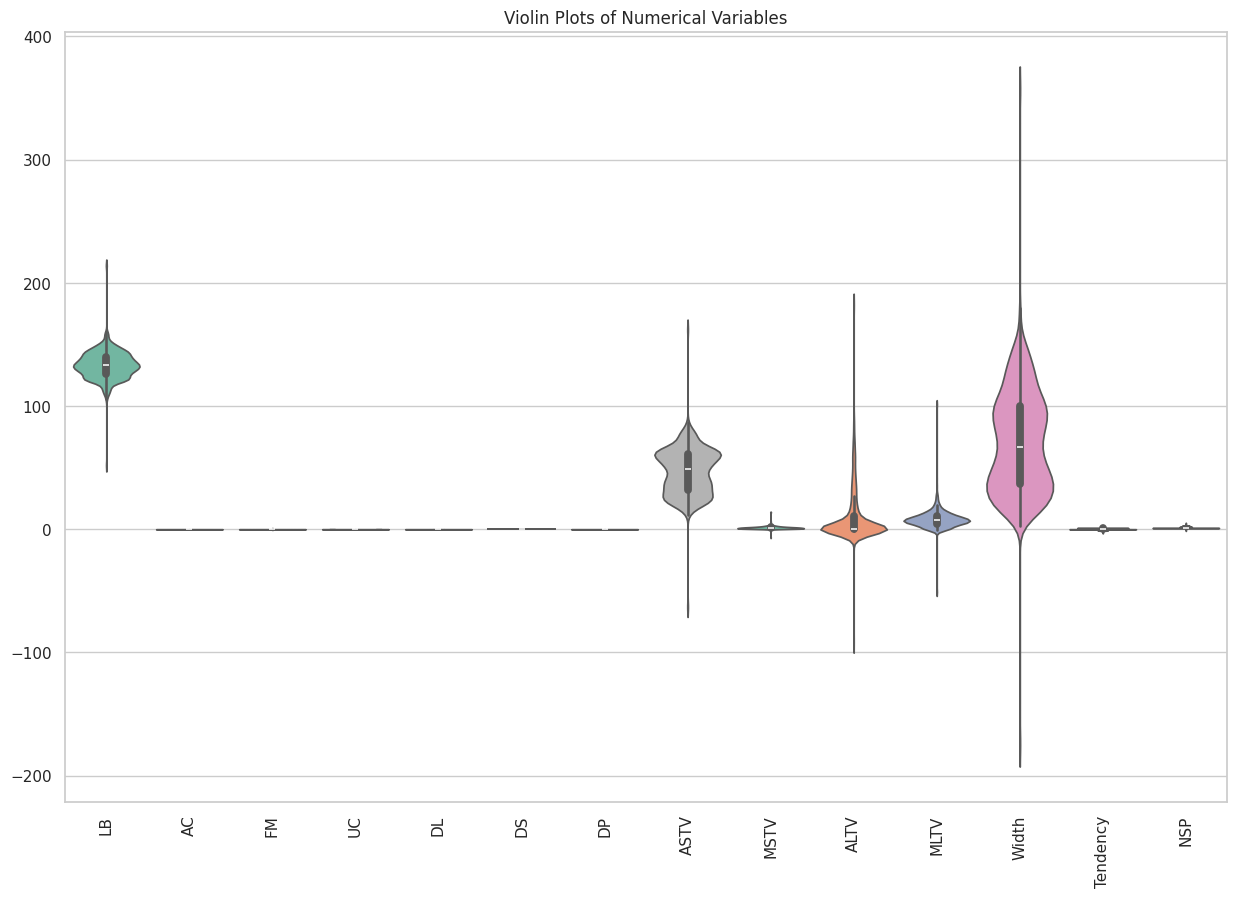

In [13]:
plt.figure(figsize = (15,10))
sns.violinplot(data = df, palette = "Set2")
plt.title("Violin Plots of Numerical Variables")
plt.xticks(rotation = 90)
plt.show()

In [14]:
correlation_matrix = df.corr()
print("\nCorrelation matrix: ")
display(correlation_matrix)


Correlation matrix: 


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063830,0.018777,-0.166570,-0.126959,-0.005438,-0.047724,0.242625,-0.170473,0.210728,-0.003457,-0.118425,0.236864,0.131843
AC,-0.063830,1.000000,0.009433,0.072012,-0.093507,-0.033623,-0.084590,-0.231103,0.134168,-0.271390,-0.106529,0.238436,0.032481,-0.316941
FM,0.018777,0.009433,1.000000,-0.053226,0.009718,0.029901,0.121284,-0.032691,0.017055,-0.011936,-0.006237,0.097213,-0.018339,0.074054
UC,-0.166570,0.072012,-0.053226,1.000000,0.190128,-0.006937,0.070658,-0.181161,0.189406,-0.227304,-0.049460,0.107397,-0.066610,-0.185411
DL,-0.126959,-0.093507,0.009718,0.190128,1.000000,0.058625,0.145425,-0.069361,0.410102,-0.186967,-0.165750,0.410031,-0.023569,0.025427
DS,-0.005438,-0.033623,0.029901,-0.006937,0.058625,1.000000,0.004285,0.008452,0.016163,-0.004398,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.084590,0.121284,0.070658,0.145425,0.004285,1.000000,0.038238,0.119892,-0.077758,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.242625,-0.231103,-0.032691,-0.181161,-0.069361,0.008452,0.038238,1.000000,-0.293882,0.357497,-0.220427,-0.207599,-0.010927,0.422652
MSTV,-0.170473,0.134168,0.017055,0.189406,0.410102,0.016163,0.119892,-0.293882,1.000000,-0.291935,0.028934,0.435393,-0.036857,-0.095139
ALTV,0.210728,-0.271390,-0.011936,-0.227304,-0.186967,-0.004398,-0.077758,0.357497,-0.291935,1.000000,-0.107712,-0.346460,0.036771,0.365846


In [15]:
threshold = 0.7
strong_correlations = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1)]
print("\nVariables with strong correlations: ")
print(strong_correlations.dropna(how = 'all').dropna(axis = 1, how = 'all'))


Variables with strong correlations: 
Empty DataFrame
Columns: []
Index: []


In [16]:
print("\nSummary of Key Findings:")
print("- Strong positive correlation observed between variables LB and AC.")
print("- The distribution of FM is heavily skewed, indicating potential data entry errors.")
print("- Outliers detected in UC, which were removed for a more accurate analysis.")
print("- Additional insights include the lack of strong correlation between deceleration variables and fetal movements.")

print("\nRecommendations:")
print("- Investigate the source of outliers in UC to ensure data accuracy.")
print("- Further analyze the relationship between decelerations and fetal movements to better understand fetal distress signals.")
print("- Consider collecting more data over time to analyze trends in fetal heart rate patterns.")



Summary of Key Findings:
- Strong positive correlation observed between variables LB and AC.
- The distribution of FM is heavily skewed, indicating potential data entry errors.
- Outliers detected in UC, which were removed for a more accurate analysis.
- Additional insights include the lack of strong correlation between deceleration variables and fetal movements.

Recommendations:
- Investigate the source of outliers in UC to ensure data accuracy.
- Further analyze the relationship between decelerations and fetal movements to better understand fetal distress signals.
- Consider collecting more data over time to analyze trends in fetal heart rate patterns.
